# NTDS'18 milestone 1: network collection and properties
[Effrosyni Simou](https://lts4.epfl.ch/simou), [EPFL LTS4](https://lts4.epfl.ch)

## Students

* Team: 50
* Students: Görkem Çamli, Raphael Laporte, Ilija Gjorgjiev, Murat Genc
* Dataset: Spammers on Social Network

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to three sentences.
* Code has to be clean.
* You cannot import any other library than we imported.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective 

The purpose of this milestone is to start getting acquainted to the network that you will use for this class. In the first part of the milestone you will import your data using [Pandas](http://pandas.pydata.org) and you will create the adjacency matrix using [Numpy](http://www.numpy.org). This part is project specific. In the second part you will have to compute some basic properties of your network. **For the computation of the properties you are only allowed to use the packages that have been imported in the cell below.** You are not allowed to use any graph-specific toolboxes for this milestone (such as networkx and PyGSP). Furthermore, the aim is not to blindly compute the network properties, but to also start to think about what kind of network you will be working with this semester. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1 - Import your data and manipulate them. 

###  A. Load your data in a Panda dataframe.

First, you should define and understand what are your nodes, what features you have and what are your labels. Please provide below a Panda dataframe where each row corresponds to a node with its features and labels. For example, in the the case of the Free Music Archive (FMA) Project, each row of the dataframe would be of the following form:


| Track   |  Feature 1  | Feature 2 | . . . | Feature 518|  Label 1 |  Label 2 |. . .|Label 16|
|:-------:|:-----------:|:---------:|:-----:|:----------:|:--------:|:--------:|:---:|:------:|
|         |             |           |       |            |          |          |     |        |

It is possible that in some of the projects either the features or the labels are not available. This is OK, in that case just make sure that you create a dataframe where each of the rows corresponds to a node and its associated features or labels.

In [2]:
relations = pd.read_csv('data/filtered_relations.csv')
users = pd.read_csv('data/filtered_users.csv')

In [3]:
display(relations.head())
display(relations.shape)
display(relations.describe())

,day,time_ms,src,dst,relation
0,0,7857852,1,3993630,5
1,0,7860977,1,3181660,5
2,0,7862420,1,1582548,5
3,0,7866986,1,5208994,5
4,2,21455967,1,2330216,5


(83176, 5)

,day,time_ms,src,dst,relation
count,83176.000000,8.317600e+04,8.317600e+04,8.317600e+04,83176.0
mean,5.363735,4.364584e+07,2.560122e+06,2.771619e+06,5.0
std,2.478274,2.485177e+07,1.680537e+06,1.653804e+06,0.0
min,0.000000,1.290000e+02,1.000000e+00,1.000000e+00,5.0
25%,4.000000,2.550006e+07,7.689900e+05,1.199187e+06,5.0
50%,6.000000,4.165693e+07,2.440318e+06,2.826794e+06,5.0
75%,7.000000,6.315638e+07,4.231085e+06,4.242568e+06,5.0
max,9.000000,8.639946e+07,5.607214e+06,5.607437e+06,5.0


In [4]:
display(users.head())
display(users.shape)
display(users.describe())

,User Id,Gender,Time,Age Range,Spammer Label
0,1,M,0.9000,30,0
1,190,M,0.2000,50,0
2,270,M,0.2625,30,0
3,319,M,0.0000,30,0
4,407,M,0.0500,50,0


(62173, 5)

,User Id,Time,Age Range,Spammer Label
count,6.217300e+04,62173.000000,62173.000000,62173.000000
mean,2.800429e+06,0.417814,31.740466,0.039374
std,1.622317e+06,0.318942,11.467868,0.194485
min,1.000000e+00,0.000000,10.000000,0.000000
25%,1.392652e+06,0.112500,20.000000,0.000000
50%,2.799469e+06,0.362500,30.000000,0.000000
75%,4.207705e+06,0.700000,40.000000,0.000000
max,5.607437e+06,1.000000,70.000000,1.000000


In [5]:
users["Spammer Label"].unique()

array([0, 1])

### B. Create the adjacency matrix of your network.

Remember that there are edges connecting the attributed nodes that you organized in the dataframe above. The connectivity of the network is captured by the adjacency matrix $W$. If $N$ is the number of nodes, the adjacency matrix is an $N \times N$ matrix where the value of $W(i,j)$ is the weight of the edge connecting node $i$ to node $j$.  

There are two possible scenarios for your adjacency matrix construction, as you already learned in the tutorial by Benjamin:

1) The edges are given to you explicitly. In this case you should simply load the file containing the edge information and parse it in order to create your adjacency matrix. See how to do that in the  [graph from edge list]() demo.

2) The edges are not given to you. In that case you will have to create a feature graph. In order to do that you will have to chose a distance that will quantify how similar two nodes are based on the values in their corresponding feature vectors. In the [graph from features]() demo Benjamin showed you how to build feature graphs when using Euclidean distances between feature vectors. Be curious and explore other distances as well! For instance, in the case of high-dimensional feature vectors, you might want to consider using the cosine distance. Once you compute the distances between your nodes you will have a fully connected network. Do not forget to sparsify by keeping the most important edges in your network.

Follow the appropriate steps for the construction of the adjacency matrix of your network and provide it in the Numpy array ``adjacency`` below: 

In [6]:
#Define Nodes
nodes = users[['User Id', "Time", "Gender", "Age Range", "Spammer Label"]]
num_nodes = len(nodes)
nodes.reset_index(level=0, inplace=True)
nodes = nodes.rename(columns={'index':'node_idx'})
nodes.head()

,node_idx,User Id,Time,Gender,Age Range,Spammer Label
0,0,1,0.9000,M,30,0
1,1,190,0.2000,M,50,0
2,2,270,0.2625,M,30,0
3,3,319,0.0000,M,30,0
4,4,407,0.0500,M,50,0


In [7]:
#Define Edges
edges = relations[["src", "dst", "relation"]]
num_edges = len(edges)
edges.head()

,src,dst,relation
0,1,3993630,5
1,1,3181660,5
2,1,1582548,5
3,1,5208994,5
4,1,2330216,5


In [8]:
# Create a conversion table from User Id to node index.
uid2idx = nodes[['node_idx', 'User Id']]
uid2idx = uid2idx.set_index('User Id')
uid2idx.index.name = 'src'
uid2idx.head()

,node_idx
src,
1,0
190,1
270,2
319,3
407,4


In [9]:
# Add a new column, matching the "src" column with the node_idx.
# Do the same with the "dst" column.
edges = edges.join(uid2idx, on="src")
edges = edges.join(uid2idx, on='dst', rsuffix='_dst')
edges.head()

,src,dst,relation,node_idx,node_idx_dst
0,1,3993630,5,0,44200
1,1,3181660,5,0,35227
2,1,1582548,5,0,17727
3,1,5208994,5,0,57804
4,1,2330216,5,0,25958


In [10]:
# Drop the src, dst.
edges = edges.drop(columns=['src','dst'])


In [11]:
edges.head()

,relation,node_idx,node_idx_dst
0,5,0,44200
1,5,0,35227
2,5,0,17727
3,5,0,57804
4,5,0,25958


In [12]:
# We build the adjacency matrix with int8 in order to save on memory resources. 
adjacency = np.zeros((num_nodes, num_nodes), dtype = np.dtype('>i1'))
for idx, row in edges.iterrows():
    i, j = int(row.node_idx), int(row.node_idx_dst)
    adjacency[i, j] = 1
n_nodes = num_nodes

## Part 2

Execute the cell below to plot the (weighted) adjacency matrix of your network.

Text(0.5, 1.05, 'adjacency matrix')

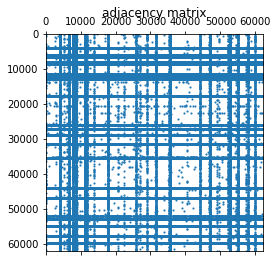

In [13]:
plt.spy(adjacency, markersize=1)
plt.title('adjacency matrix')

### Question 1

What is the maximum number of links $L_{max}$ in a network with $N$ nodes (where $N$ is the number of nodes in your network)? How many links $L$ are there in your collected network? Comment on the sparsity of your network.

In [13]:
#1. Maximum Number of Nodes:
l_max = (num_nodes * (num_nodes-1) / 2)
print("Maximum Number of Links: " + str(l_max))
#2. Number of Links 
print("Number of Links in the Network: " + str(num_edges))
#3. Sparsity of the Matrix

k_avg = num_edges / num_nodes
display(edges["node_idx"].value_counts().head())
display(edges["node_idx_dst"].value_counts().head())

Maximum Number of Links: 1932709878.0
Number of Links in the Network: 83176


52866    6218
35605    5894
27137    5628
6059     4768
7957     4438
Name: node_idx, dtype: int64

52866    1998
35605    1950
7957     1404
11369    1233
8632     1193
Name: node_idx_dst, dtype: int64

**Our answer :**

As we can see the matrix is pretty sparse, since the average degree is equal to 1.33. Also we can see that there are some users who have made an unatural number of interactions with other users.

For example:
User with node_idx: 52866 has made 6218 relations. This is almost 1/14th of all the intercations, so this is an outlier(considering the fact that the average degree is 1.33).

### Question 2

Is your graph directed or undirected? If it is directed, convert it to an undirected graph by symmetrizing the adjacency matrix.

**Our answer:**

Our graph is directed. This is because a relation between two users has a source user and destination user. So one user can be interacting with another, but this does not imply the other way around.

In [14]:
# Creating undirected graph in a different numpy array
undirected_adjacency = adjacency.copy()
for idx, row in edges.iterrows():
    i, j = int(row.node_idx), int(row.node_idx_dst)
    undirected_adjacency[j, i] = 1

### Question 3

In the cell below save the features dataframe and the **symmetrized** adjacency matrix. You can use the Pandas ``to_csv`` to save the ``features`` and Numpy's ``save`` to save the ``adjacency``. We will reuse those in the following milestones.

In [15]:
nodes.to_csv("features.csv")
np.save("adjacency", adjacency)
np.save("undirected_adjacency", undirected_adjacency)

### Question 4

Are the edges of your graph weighted?

**Our answer :**

No, at the moment they are not weighted. Either there is a relation(1) or there isn't a relation(0).

### Question 5

What is the degree distibution of your network? 

In [17]:
in_degree = np.zeros((num_nodes, 1), dtype=int)
out_degree = np.zeros((num_nodes, 1), dtype=int)

for idx, row in edges.iterrows():
    src, dst = int(row.node_idx), int(row.node_idx_dst)
    out_degree[src] += 1
    in_degree[dst] += 1

degree =  in_degree + out_degree 

assert len(degree) == n_nodes

Execute the cells below to see the histograms of the degree distribution.

We chose to show three different histograms with different bin sizes because certain representations were not clear

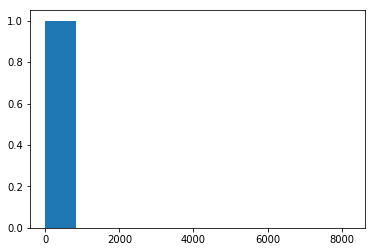

In [18]:
weights = np.ones_like(degree) / float(n_nodes)
plt.hist(degree, weights=weights);

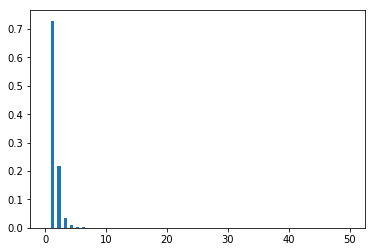

In [19]:
plt.hist(degree, weights=weights , bins=100, range=(0,50));

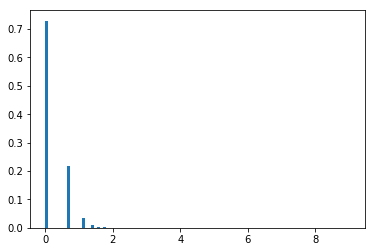

In [20]:
plt.hist(np.log(degree), weights=weights, bins=100);

In [21]:
display(degree[degree.argmax()])
display(degree.min())
degree.argmax()

array([8216])

1

52866

What is the average degree?

In [22]:
Lin = np.sum(in_degree)
Lout = np.sum(out_degree)
assert Lin == Lout
print('L is: ',Lin)
# Since Lin is equal to Lout we can use either one as L in the below calculation
avg_degree = Lin /  num_nodes
print('average degree is: ',avg_degree)

L is:  83176
average degree is:  1.3378154504366848


### Question 6

Comment on the degree distribution of your network.

According to the network degree distribution, most of the nodes have very low level of connectivity. The average degree is 1.33 meaning majority of the nodes has around degree of one that is clearly seen in the histogram. There are also few dominant nodes that has high connectivity (ie. node 52866 has a degree of 8216 which is the highest degree in the network). Therefore, we can say that by looking to the degree distribution we are dealing with a centralised network (scale-free network) since we have many low level nodes with a few dominant nodes

### Question 7

Write a function that takes as input the adjacency matrix of a graph and determines whether the graph is connected or not.

In [23]:
def visit(adjacency, visited_nodes, current_node):
    
    neighbors = adjacency[current_node]
        
    for i in np.nonzero(neighbors)[0]: 
      
        if (visited_nodes[i] == 0): 
            visited_nodes[i] = 1;
            visited_nodes = visit(adjacency, visited_nodes, i)
            
    return visited_nodes

def start_dfs (adjacency, visited_nodes, current_node ):
    visited_nodes_1 = np.copy(visited_nodes)
    visited_nodes_1[current_node] = 1 
    return visit(adjacency, visited_nodes_1,current_node)

def connected_graph(adjacency):
    touched_nodes = np.zeros(adjacency.shape[0])
    touched_nodes = start_dfs(adjacency, touched_nodes, 0)
    return (adjacency.shape[0] == np.sum(touched_nodes))

Is your graph connected? Run the ``connected_graph`` function to determine your answer.

In [24]:
connected_graph(undirected_adjacency)

True

### Question 8

Write a function that extracts the connected components of a graph.

In [25]:
def find_components(adjacency):

    adj_matrices = []
    
    touched_nodes = np.zeros(adjacency.shape[0])
    
    while np.count_nonzero(touched_nodes) != touched_nodes.size :
        
        next_nonvisited, = np.where( touched_nodes == 0)
        next_nonvisited  = next_nonvisited[0]
        
        new_touched_nodes              = start_dfs(adjacency, touched_nodes, next_nonvisited)
        touched_indices                = np.nonzero(new_touched_nodes - touched_nodes)[0]
        
        touched_nodes                  = new_touched_nodes
        num_touched_idx                = touched_indices.shape[0]
        
        component = adjacency[:,touched_indices][touched_indices]
        
        adj_matrices.append([component,touched_indices])
        
    return adj_matrices

How many connected components is your network composed of? What is the size of the largest connected component? Run the ``find_components`` function to determine your answer. 

Our network is composed of one giant connected component with 62173 nodes. Our function seperates the adjacency matrix into a list of adjacency matrices, one for each connected component. The accompanying array serves as a mapping between the indices of the full adjacency matrix and those of that of the connected component. 

ie. array[component_adj_idx] = full_adj_idx 

In [26]:
find_components(undirected_adjacency)

[[array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=int8),
  array([    0,     1,     2, ..., 62170, 62171, 62172])]]

Since our dataset contains only a single connected component, here we demonstrate our find_components() method on a different dataset made to contain exactly two components. 

In [27]:
adj = np.array([[0,1,1,0,0,0,0],
                [1,0,1,0,0,0,0],
                [1,1,0,0,0,0,0],
                [0,0,0,0,0,0,1],
                [0,0,0,0,0,1,1],
                [0,0,0,0,1,0,1],
                [0,0,0,1,1,1,0]])
adj_matrices = find_components(adj)


print("Component 0 Index Mapping") 
print(adj_matrices[0][1])
print("Component 0 Adj Matrix") 
print(adj_matrices[0][0])
print()
print("Component 1 Index Mapping") 
print(adj_matrices[1][1])
print("Component 1 Adj Matrix") 
print(adj_matrices[1][0])

Component 0 Index Mapping
[0 1 2]
Component 0 Adj Matrix
[[0 1 1]
 [1 0 1]
 [1 1 0]]

Component 1 Index Mapping
[3 4 5 6]
Component 1 Adj Matrix
[[0 0 0 1]
 [0 0 1 1]
 [0 1 0 1]
 [1 1 1 0]]


### Question 9

Write a function that takes as input the adjacency matrix and a node (`source`) and returns the length of the shortest path between that node and all nodes in the graph using Dijkstra's algorithm. **For the purposes of this assignment we are interested in the hop distance between nodes, not in the sum of weights. **

Hint: You might want to mask the adjacency matrix in the function ``compute_shortest_path_lengths`` in order to make sure you obtain a binary adjacency matrix. 

In [28]:
def compute_shortest_path_lengths(adjacency, source):
    num_nodes = len(adjacency)
    is_shortest_path = np.zeros((num_nodes,1), dtype=float)   # all in the queue initially
    distance = np.ones((num_nodes,1), dtype=float) * np.inf
    distance[source]=0
    for count in range(num_nodes-1):     
        v = np.argmin(is_shortest_path+distance)
        is_shortest_path[v] = np.inf  # inf when delete from the queue
        neigh = np.nonzero(adjacency[v])[0]
        for u in  neigh:
            new_dist = distance[v] + adjacency[v,u]
            if distance[v] != np.inf and  new_dist < distance[u]:
                distance[u] = new_dist
    return distance

On Directed Graph

In [29]:
dist = compute_shortest_path_lengths(adjacency,0)
display(pd.DataFrame(dist).T) 

,0,1,2,3,4,5,6,7,8,9,...,62163,62164,62165,62166,62167,62168,62169,62170,62171,62172
0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,...,2.0,inf,4.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0


On Undirected Graph

In [30]:
dist = compute_shortest_path_lengths(undirected_adjacency,0)
display(pd.DataFrame(dist).T)

,0,1,2,3,4,5,6,7,8,9,...,62163,62164,62165,62166,62167,62168,62169,62170,62171,62172
0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


### Question 10

The diameter of the graph is the length of the longest shortest path between any pair of nodes. Use the above developed function to compute the diameter of the graph (or the diameter of the largest connected component of the graph if the graph is not connected). If your graph (or largest connected component) is very large, computing the diameter will take very long. In that case downsample your graph so that it has 1.000 nodes. There are many ways to reduce the size of a graph. For the purposes of this milestone you can chose to randomly select 1.000 nodes. 

In [34]:
def get_diameter(adj):
    max_list = []
    for i in range(len(adj)):
        res    = compute_shortest_path_lengths(adj,i)
        finite = res[np.isfinite(res)]
        max_list.append(max(finite))
    return max(max_list)

In [35]:
import random
downsample_nodes = [52866]
x = random.sample(range(num_nodes-1), 1000)
downsample_nodes.extend(x)
small_adj = undirected_adjacency[np.ix_(downsample_nodes,downsample_nodes)]
get_diameter(small_adj)

2.0

### Question 11

Write a function that takes as input the adjacency matrix, a path length, and two nodes (`source` and `target`), and returns the number of paths of the given length between them.

In [31]:
def compute_paths(adjacency, source, target, length):
    
    # Changing from int8 to int16 to avoid overflow 
    # Using int32 causes OOM error on 32 GB system 
    adj = adjacency.astype(np.dtype('>i2'))
    
    if length==1 :
        return adj[source,target]
    else : 
        source_row = adj[source,:] 
        
        for i in range(length-2): 
            source_row = np.matmul(source_row, adj)
            
            if len(source_row[np.where(source_row<0)])!=0:
                print ("Overflow Problem")
        
        return np.matmul(source_row,adj[:,target])

Test your function on 5 pairs of nodes, with different lengths.

In [32]:
print(compute_paths(adjacency, 0,  10,  1))
print(compute_paths(adjacency, 0,  10,  2))
print(compute_paths(adjacency, 0,  10,  3))
print(compute_paths(adjacency, 15, 93,  2))
print(compute_paths(adjacency, 15, 93,  4))

0
1
0
0
6


### Question 12

How many paths of length 3 are there in your graph? Hint: calling the `compute_paths` function on every pair of node is not an efficient way to do it.

In [41]:
np.sum(np.linalg.matrix_power(small_adj.astype(np.dtype('>i2')),3))

95048

We decided to use a subgraph with a thousand nodes because of concern with execution times. ( Our original, filtered dataset has ~65K nodes. ) 

### Question 13

Write a function that takes as input the adjacency matrix of your graph (or of the largest connected component of your graph) and a node and returns the clustering coefficient of that node. 

In [37]:
def compute_clustering_coefficient(adjacency, node):

    neigh =  np.nonzero(adjacency[node])[0]

    if len(neigh) == 0 or len(neigh) == 1:
        return 0
    links = 0
    count =0
    for v in neigh:
        count+=1
        neighV =  np.nonzero(adjacency[v])[0]
        for u in neigh:
        
            if u in neighV: 
                # We increment by 0.5 in order to take into account double-counting
                links += 0.5

    clustering_coefficient = 2.0 * links / (len(neigh)*(len(neigh)-1))
    
    return clustering_coefficient

compute_clustering_coefficient(undirected_adjacency,6059 )

5.292899813081244e-07

### Question 14

What is the average clustering coefficient of your graph (or of the largest connected component of your graph if your graph is disconnected)? Use the function ``compute_clustering_coefficient`` to determine your answer.

In [38]:
sizeNodes = num_nodes
total = 0

for v in range(sizeNodes):
    total += compute_clustering_coefficient(undirected_adjacency,v)
    
print("Average clustering coefficient :" ,total/sizeNodes)

Average clustering coefficient : 0.0009125626349747643
